In [1]:
%%html
<style type='text/css'>
.CodeMirror{
    font-size: 18px;
}

div.output_area pre {
    font-size: 16px;
}
</style>

# Dự đoán tình trạng xe với Logistic Regression

In [2]:
import numpy as np
import scipy.stats as stats
from matplotlib import pyplot as plt

## 1. Load và convert dữ liệu 

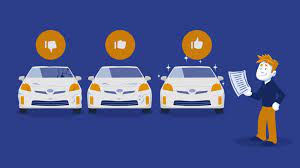

In [3]:
# Header: #price,maintenance,doors,persons,lug_capacity,safety, output (the condition of the car)
raw_data = np.genfromtxt('data/used_car_evaluation.csv', 
                         dtype=str, 
                         delimiter=',', 
                         skip_header=1,
                        )
print(raw_data[0])
print(raw_data[-1])
print(raw_data.shape)

['vhigh' 'vhigh' '2' '2' 'small' 'low' 'unacc']
['low' 'low' '5more' 'more' 'big' 'high' 'vgood']
(1728, 7)


**Kiểm tra các giá trị duy nhất của từng cột dữ liệu**

In [4]:
# Features: 6 cột đầu
print("Price:		", np.unique(raw_data[:,0]))
print("Maintenance:	", np.unique(raw_data[:,1]))
print("Doors:		", np.unique(raw_data[:,2]))
print("Persons:	", np.unique(raw_data[:,3]))
print("Lug_capacity:	", np.unique(raw_data[:,4]))
print("Safety:		", np.unique(raw_data[:,5]))

Price:		 ['high' 'low' 'med' 'vhigh']
Maintenance:	 ['high' 'low' 'med' 'vhigh']
Doors:		 ['2' '3' '4' '5more']
Persons:	 ['2' '4' 'more']
Lug_capacity:	 ['big' 'med' 'small']
Safety:		 ['high' 'low' 'med']


In [5]:
# Giá trị cần đoán: cột thứ 7 
#    (tình trạng xe: acceptable, good, unacceptable, very-good)
print("Output:", np.unique(raw_data[:,6]))

Output: ['acc' 'good' 'unacc' 'vgood']


### Vì dữ liệu là dạng categorical, cần chuyển sang dạng số

**Sử dụng LabelEncoder của thư viện sklearn để chuyển từng cột sang dạng số**

- Lưu ý: phải thực hiện trên từng cột, vì mỗi cột là 1 feature

In [6]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
LE = LabelEncoder()

In [7]:
# Thử transform 1 cột:
col0 = raw_data[:,0]
col0_new = LE.fit_transform(col0)

print(col0)
print(col0_new)

['vhigh' 'vhigh' 'vhigh' ... 'low' 'low' 'low']
[3 3 3 ... 1 1 1]


**Thực hiện trên 6 cột đầu: Input**

In [8]:
ds_cols = [LE.fit_transform(col) for col in raw_data.T[0:6]]
X = np.stack(ds_cols, axis=1)
print(X.shape)

(1728, 6)


**Thực hiện cho cột output**

In [9]:
Y = LE.fit_transform(raw_data[:,6])
print(Y.shape)

(1728,)


**Kiểm tra thử một sample**

In [10]:
print(X[0])
print(Y[0])

[3 3 0 0 2 1]
2


## 2. Chia dữ liệu ra thành 2 tập train và test

In [11]:
np.random.seed(30)
rand_indices = np.arange(1728)
np.random.shuffle(rand_indices)
print(rand_indices)

[ 853 1556  133 ...  500  941  421]


In [12]:
N_TRAIN = 1600
train_indices = rand_indices[0:N_TRAIN]
test_indices = rand_indices[N_TRAIN:]

x_train, y_train = X[train_indices], Y[train_indices]
print(x_train.shape, y_train.shape)

x_test, y_test = X[test_indices], Y[test_indices]
print(x_test.shape, y_test.shape)

(1600, 6) (1600,)
(128, 6) (128,)


## 3. Tạo mô hình logistic regression

In [13]:
from sklearn.linear_model import LogisticRegression

# Tạo một đối tượng regressor (mô hình dự đoán)
regressor = LogisticRegression()

In [14]:
# Tiến hành train
regressor.fit(x_train, y_train)

LogisticRegression()

In [15]:
# Đánh giá chất lượng mô hình với dữ liệu train
print("Training accuracy: ", regressor.score(x_train, y_train))

Training accuracy:  0.695625


## 4. Sử dụng mô hình

In [16]:
# Đánh giá chất lượng mô hình trên dữ liệu test
acc = regressor.score(x_test, y_test)
print("Testing accuracy: %.2f"%(acc))

Testing accuracy: 0.69


**Thử dùng mô hình để dự đoán một số sample nào đó**

In [17]:
idx = 6
idx_loai = regressor.predict([x_test[idx]])[0]
print("Dự đoán:", idx_loai)
print("Thực tế:", y_test[idx])

Dự đoán: 3
Thực tế: 0


In [18]:
ds_loai = np.unique(raw_data[:,6])
ds_loai[idx_loai]

'vgood'

**Dùng mô hình để dự đoán tất cả samples trong tập test**

In [19]:
test_y = regressor.predict(x_test)
print(test_y)

[2 2 2 2 2 2 3 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2
 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 0 2 2 2 2 2 2 2
 2 2 2 2 2 0 3 0 2 2 2 2 2 2 0 2 0 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 3 2 2 2
 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2]


In [20]:
print(y_test)

[2 2 2 2 2 2 0 2 2 0 2 2 2 2 2 2 2 0 0 2 1 1 2 2 2 0 2 2 2 2 0 0 2 2 2 2 2
 2 2 2 2 2 2 0 2 2 0 0 2 0 2 2 2 0 0 2 2 2 2 1 0 0 0 0 2 1 0 2 2 0 2 2 1 2
 2 2 0 2 2 2 3 2 0 2 2 2 2 2 2 2 2 2 2 2 0 3 1 2 2 2 2 2 2 0 2 0 2 3 2 2 2
 0 2 2 0 0 0 0 2 3 2 2 2 2 2 2 0 0]


## 5. Đánh giá mô hình với Khoảng tin cậy

In [21]:
# Confidence Interval of 95%
z = 1.96
n = y_test.shape[0]

interval = z*np.sqrt(acc*(1-acc)/n)

print(interval)
print("CI of 95%%: %.2f +/- %.2f"%(acc,interval))

0.08029942743802723
CI of 95%: 0.69 +/- 0.08
